In [1]:
%pip install nbconvert
import pandas
import matplotlib.pyplot as plot
import pygal
import country_converter as toCode
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns
#Problem 1

#read the files
authors = pandas.read_csv("authorInfo.csv")
articles = pandas.read_csv("articleInfo.csv")


#now, I will merge them into one data frame
merged = authors.merge(articles, on = "Article No.")

#filling the empty cells with the value 0
merged.fillna(0)

#check if they merged well by printing it out in a file.
merged.to_csv("merged.csv", index = False)

#1.1 yearly_publication figure
#pandas.value_counts((articles['Year'])).plot.bar()
#articles['Year'].plot(kind = 'hist')
articles['Article No.'].groupby([articles['Year']]).count().plot(kind='bar')
plot.title("yearly_publication")
plot.xlabel("Year")
plot.ylabel("Articles Published")
plot.show()


Defaulting to user installation because normal site-packages is not writeable
  Using cached nbconvert-7.2.9-py3-none-any.whl (274 kB)
  Using cached pandocfilters-1.5.0-py2.py3-none-any.whl (8.7 kB)
  Using cached nbformat-5.7.3-py3-none-any.whl (78 kB)
  Using cached bleach-6.0.0-py3-none-any.whl (162 kB)
  Using cached mistune-2.0.5-py2.py3-none-any.whl (24 kB)
  Using cached tinycss2-1.2.1-py3-none-any.whl (21 kB)
  Using cached nbclient-0.7.2-py3-none-any.whl (71 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 2.0 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached beautifulsoup4-4.11.2-py3-none-any.whl (129 kB)
  Using cached jupyterlab_pygments-0.2.2-py2.py3-none-any.whl (21 kB)
  Using cached jsonschema-4.17.3-py3-none-any.whl (90 kB)
  Using cached fastjsonschema-2.16.2-py3-none-any.whl (22 kB)
  Using cached soupsieve-2.4-py3-none-any.whl (37 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (1

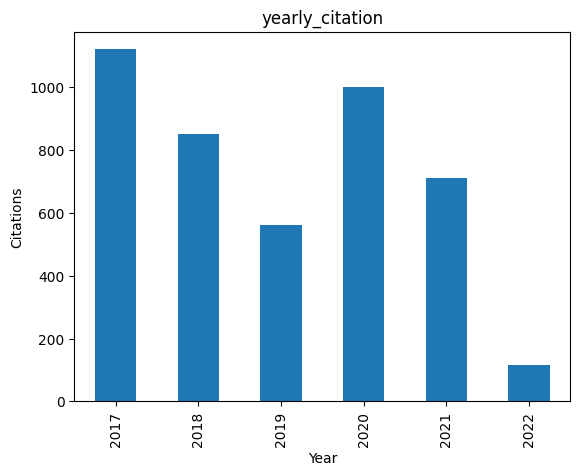

In [ ]:

#1.2 yearly_citation figure
articles['Citation'].groupby(articles['Year']).sum().plot(kind = 'bar')
plot.title("yearly_citation")
plot.xlabel("Year")
plot.ylabel("Citations")
plot.show()


In [ ]:

#1.3 Number of publications across countries

countries = merged[['Article No.', 'Country']].drop_duplicates()
countries = countries.groupby(['Country'])['Article No.'].count().reset_index( name = 'Count').sort_values(['Count'], ascending = False)
world = pygal.maps.world.World()
world.title = 'Articles published by country'
theConverter = toCode.CountryConverter()
theCodes = theConverter.pandas_convert(series = countries['Country'], to = 'ISO2')
countries['countryCode'] = theCodes;
world.add('More than 10',countries.query('Count >10')['countryCode'].str.lower())
world.add('Between 5 and 10', countries.query('Count>10 and Count>=5')['countryCode'].str.lower())
world.add('Between 2 and 5', countries.query('Count <5 and Count>=2')['countryCode'].str.lower())
world.add('Just 1', countries.query('Count == 1')['countryCode'].str.lower())
world.render(); #i ended up rendering it to png, which is attached at the end of the


Bristol not found in regex


In [ ]:


#1.4 Top 5 institutions with most published articles
new_df = merged[['Article No.', 'Author Affiliation']].drop_duplicates()
new_df = new_df.groupby(['Author Affiliation'])['Article No.'].count().reset_index( name = 'Count').sort_values(['Count'], ascending = False)
print(new_df[['Author Affiliation', 'Count']].reset_index(drop=True).head(n=5))
print()


                        Author Affiliation  Count
0                 University of Copenhagen      2
1          Cyprus University of Technology      2
2                    University of Bristol      2
3  University of Management and Technology      2
4                        Fudan University       2



In [ ]:

#1.5 Top 5 researchers that have the most h-index
top_researchers = authors[['Author Name','h-index']].sort_values(['h-index'], ascending = False).head(n=5).reset_index(drop=True)
print(top_researchers)


           Author Name  h-index
0     Ulrich Trautwein     95.0
1     Nicolas Molinari     63.0
2     George S. Athwal     59.0
3  Maria Luisa Lorusso     33.0
4  Vicente A. González     33.0


/tmp/ipykernel_1241938/2264956462.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data['SUS'], palette='bright')


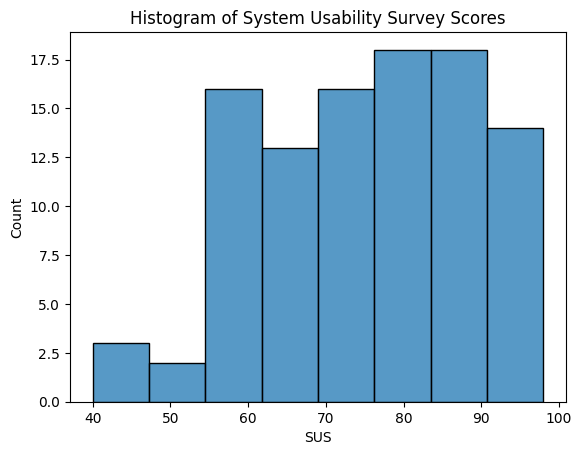

In [ ]:

#Beginning of Question 2
data = pandas.read_csv('data.csv')
data = data.fillna(0)


#need to adjust for categorical variable of gender
encoder = LabelEncoder()
encoder.fit(data['Gender'])
data['Gender'] = encoder.transform(data['Gender'])

#putting on a histogram plot the satisfaction survey results
sns.histplot(data=data['SUS'], palette='bright')
plot.title("Histogram of System Usability Survey Scores")
plot.show()


In [ ]:

print()
print("The correlation coefficients between the independent variables and the dependent variable")
#standard correlation coefficient, to see which values effect the dependent
#variable the most
print(data.corr(method='pearson')['SUS'].sort_values())



The correlation coefficients between the independent variables and the dependent variable
Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Unnamed: 6           NaN
Name: SUS, dtype: float64


In [ ]:
#it seems that Intent and ASR error, and Purchase have the most significant correlations
y= data['SUS'] #dependent variable
x= data[['Purchase','Duration','Gender','ASR_Error','Intent_Error']] #independent variables

x = sm.add_constant(x)

rmodel = sm.OLS(y, x).fit()
print(rmodel.summary());


                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        15:36:58   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

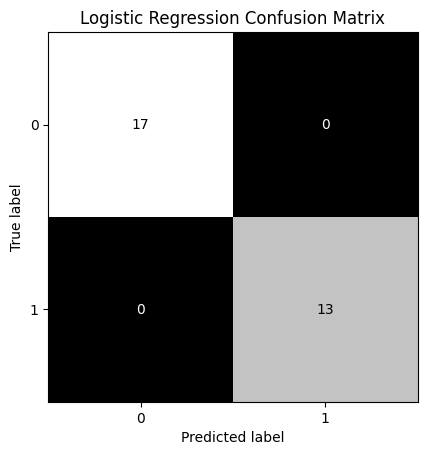

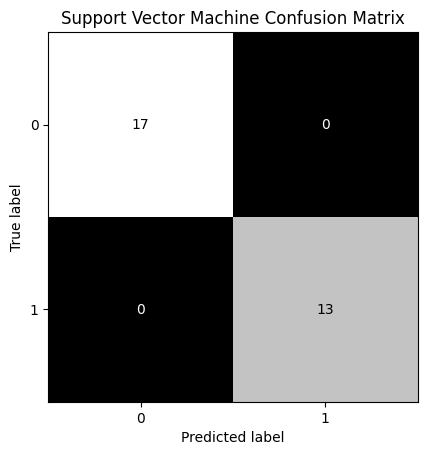

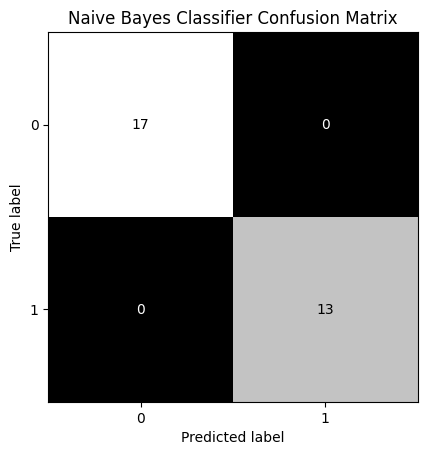

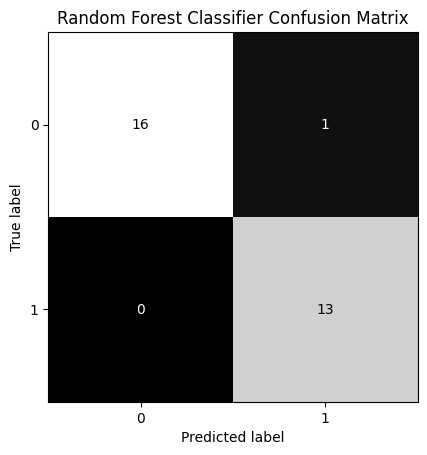

In [ ]:

#Question 3:
#Train a Classification model in which: the independent variables
#(inputs) are “ASR_Error,” “IntentError,” “Duration,” and “Gender,”; the dependent
#variable (output) is “Purchase.” Use the evaluation metrics we introduced in class to
#compare the performance of the following four machine learning classification
#algorithms: (1) Logistic Regression, (2) SVM, (3) Naive Bayes, and (4) Random
#Forest.

# We will be using the same data as last time, but since the na values will be filled
#with the mean value this time, we are re-reading
data = pandas.read_csv('data.csv')
#print(data.isna().sum())
#only unnamed has na values, which we will not use

#now preparing data
y = data['Purchase'].to_numpy()
x = data[['ASR_Error', 'Intent_Error', 'Duration', 'Gender']].to_numpy()

#scaling the data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.3)

logistic = LogisticRegression()
svc = SVC(probability=True)
naiveB = GaussianNB()
randomForest = RandomForestClassifier()

#fitting the data into the model
logistic.fit(x_train,y_train)
svc.fit(x_train,y_train)
naiveB.fit(x_train,y_train)
randomForest.fit(x_train,y_train)

#now get your predictions
logisticY = logistic.predict(x_test)
logisticY_pr = logistic.predict_proba(x_test)

svcY = svc.predict(x_test)
svcY_pr = svc.predict_proba(x_test)

naiveY = naiveB.predict(x_test)
naiveY_pr = naiveB.predict_proba(x_test)

rfcY = randomForest.predict(x_test)
rfcY_pr = randomForest.predict_proba(x_test)

#evaluate with confusion matrix, roc curve, and auc
print()
models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predicted = [logisticY, svcY, naiveY, rfcY]
probabilities = [logisticY_pr, svcY_pr, naiveY_pr, rfcY_pr]



for  predictedvalue, model in zip(predicted, models):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(),predictedvalue))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plot.show()


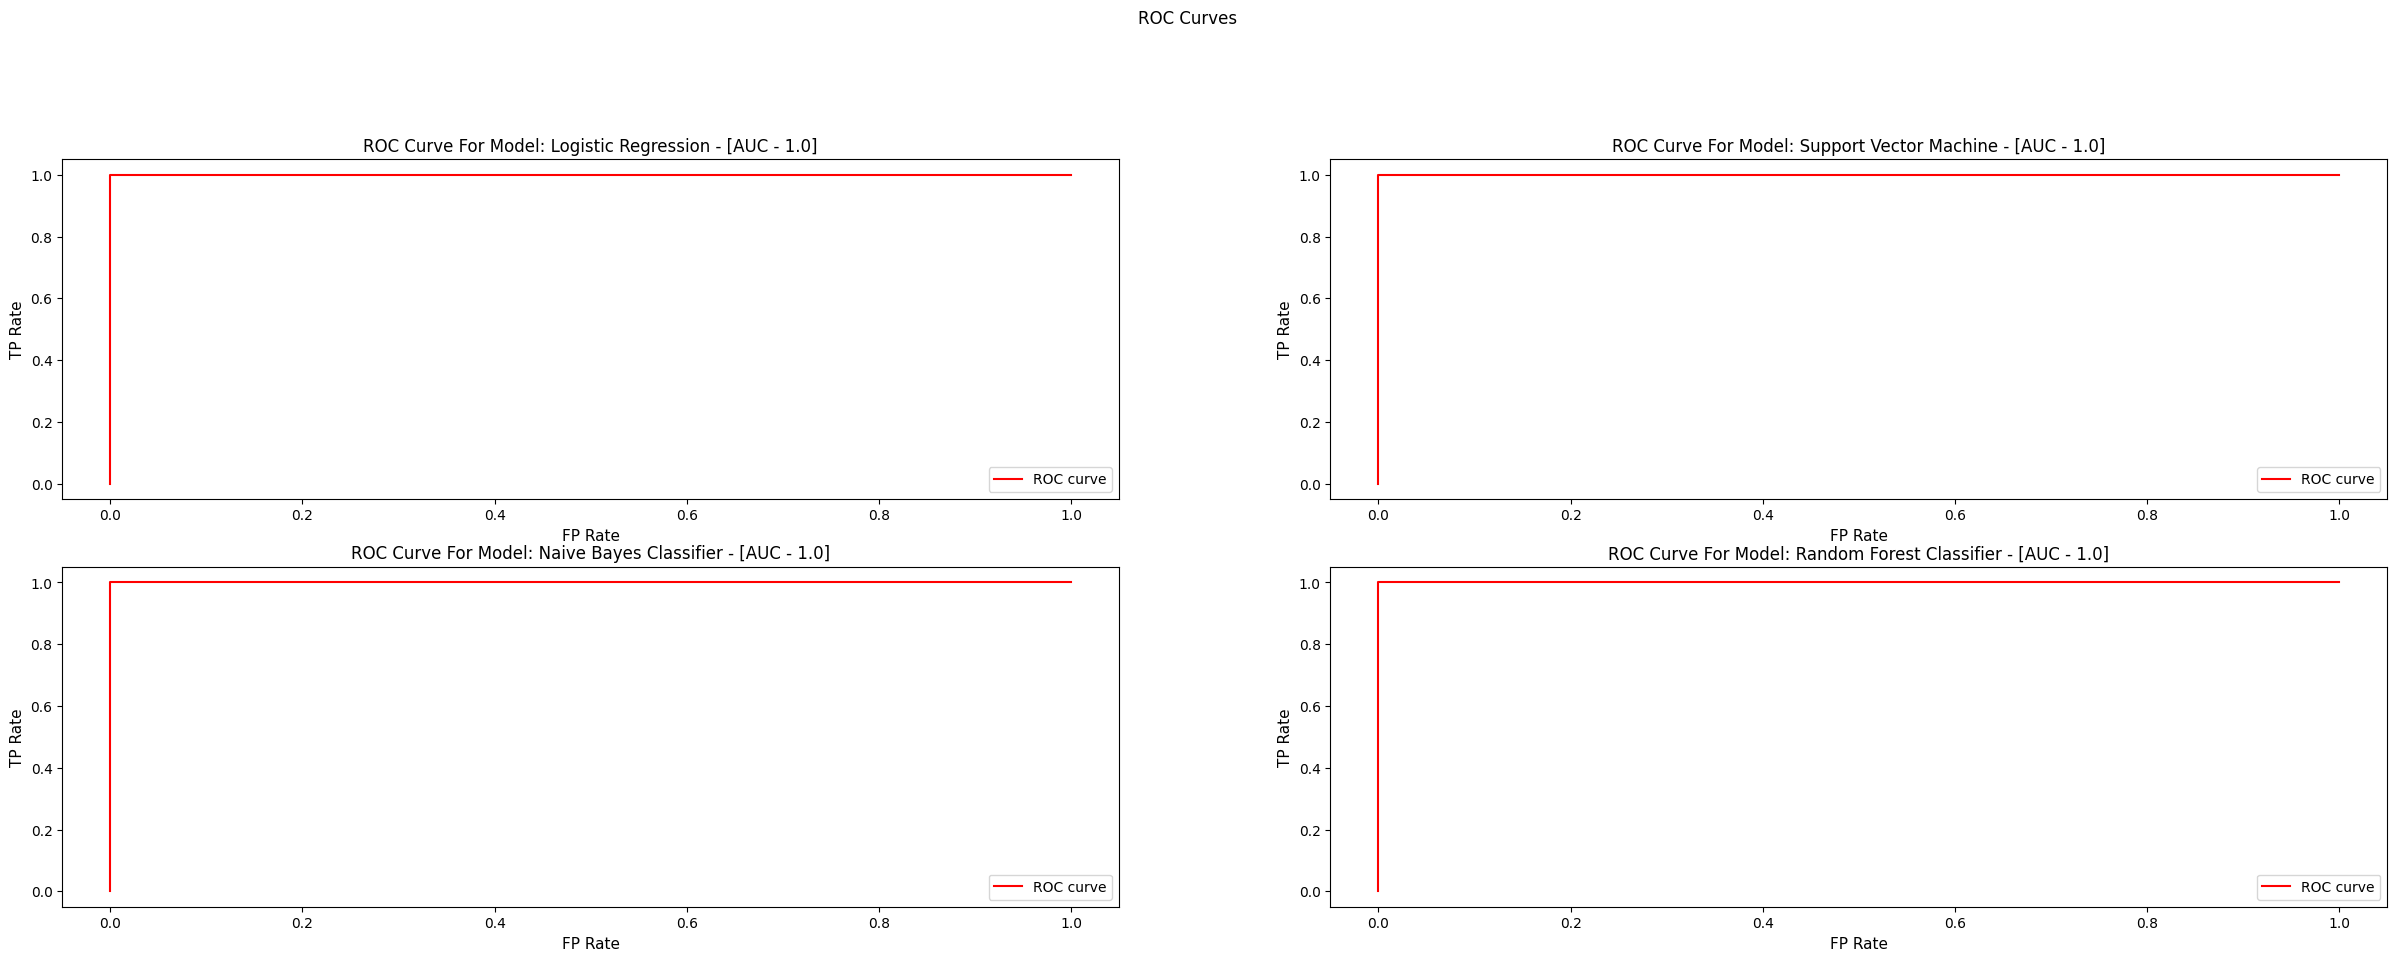

In [ ]:
plot.figure(figsize=(30, 15))
plot.suptitle("ROC Curves")
plot_index = 1
for model, probability in zip(models,probabilities):
    fpRate, tpRate, thresholds = roc_curve(y_test, probability[:, 1])
    areaUnderCurve = auc(fpRate, tpRate)
    plot.subplot(3, 2, plot_index)
    plot.plot(fpRate, tpRate, 'r', label='ROC curve')
    plot.title(f'ROC Curve For Model: {model} - [AUC - {areaUnderCurve}]', fontsize=12)
    plot.xlabel('FP Rate', fontsize=11)
    plot.ylabel('TP Rate', fontsize=11)
    plot.legend()
    plot_index += 1
plot.show()
